<a href="https://colab.research.google.com/github/brialln/Air-Data-Quality-Analysis-Using-R/blob/main/Air_Quality_Analysis_Two_Paired_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this in a Python cell to set up R in Google Colab
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314948 sha256=7eb68293aba776603e67abd2a43c75e95474d846529e17dd379393b8908dfaac
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
# Load the R magic
%load_ext rpy2.ipython

Attaching package: ‘lubridate’



    date, intersect, setdiff, union




Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

T-Test Results: PM2.5 Concentration (Daytime vs Nighttime)
T-value: -2.337521 
P-value: 0.0203765 
Degrees of Freedom: 205 

Group Statistics:
Daytime Mean: 72.90741 Standard Deviation: 53.86458 
Nighttime Mean: 91.59596 Standard Deviation: 61.14435 


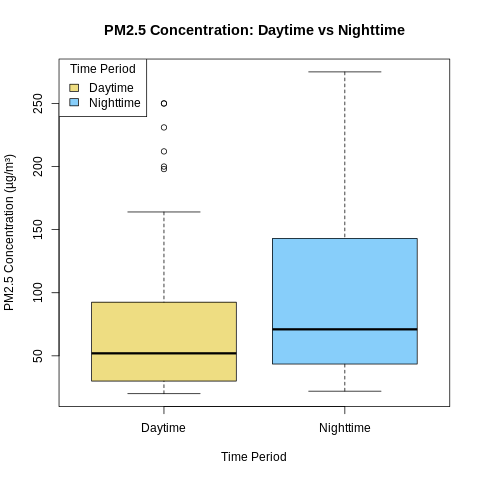

In [ ]:
%%R
# Load necessary library
library(readr)
library(lubridate)  # For working with DateTime

# Load the dataset
data <- read_csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Convert DateTime to POSIXct format
data$DateTime <- ymd_hms(data$DateTime)

# Extract the hour from DateTime
data$Hour <- hour(data$DateTime)

# Categorize into Daytime (6 AM - 6 PM) and Nighttime (6 PM - 6 AM)
data$TimePeriod <- ifelse(data$Hour >= 6 & data$Hour < 18, "Daytime", "Nighttime")

# Split PM2.5 by time period
daytime_pm25 <- data$`PM2.5 Concentration`[data$TimePeriod == "Daytime"]
nighttime_pm25 <- data$`PM2.5 Concentration`[data$TimePeriod == "Nighttime"]

# Paired T-Test: PM2.5 (Daytime vs Nighttime)
t_test_pm25_time <- t.test(daytime_pm25, nighttime_pm25, var.equal = TRUE)

# Calculate additional statistics
daytime_mean <- mean(daytime_pm25, na.rm = TRUE)
daytime_sd <- sd(daytime_pm25, na.rm = TRUE)
nighttime_mean <- mean(nighttime_pm25, na.rm = TRUE)
nighttime_sd <- sd(nighttime_pm25, na.rm = TRUE)

# Display the plot in the console
boxplot(
  PM2.5 ~ TimePeriod, data = data.frame(
    PM2.5 = c(daytime_pm25, nighttime_pm25),
    TimePeriod = c(rep("Daytime", length(daytime_pm25)), rep("Nighttime", length(nighttime_pm25)))
  ),
  col = c("lightgoldenrod", "lightskyblue"),
  main = "PM2.5 Concentration: Daytime vs Nighttime",
  xlab = "Time Period",
  ylab = "PM2.5 Concentration (µg/m³)",
  border = "black"
)

# Add a legend
legend(
  "topleft",
  legend = c("Daytime", "Nighttime"),
  fill = c("lightgoldenrod", "lightskyblue"),
  title = "Time Period"
)

# Save the plot as a PNG file
png(filename = "pm25_daytime_vs_nighttime.png", width = 800, height = 600)

# Recreate the plot for the PNG file
boxplot(
  PM2.5 ~ TimePeriod, data = data.frame(
    PM2.5 = c(daytime_pm25, nighttime_pm25),
    TimePeriod = c(rep("Daytime", length(daytime_pm25)), rep("Nighttime", length(nighttime_pm25)))
  ),
  col = c("lightgoldenrod", "lightskyblue"),
  main = "PM2.5 Concentration: Daytime vs Nighttime",
  xlab = "Time Period",
  ylab = "PM2.5 Concentration (µg/m³)",
  border = "black"
)

# Add a legend to the PNG
legend(
  "topleft",
  legend = c("Daytime", "Nighttime"),
  fill = c("lightgoldenrod", "lightskyblue"),
  title = "Time Period"
)

# Close the PNG device
dev.off()

# Print T-Test Results and Additional Statistics
cat("\nT-Test Results: PM2.5 Concentration (Daytime vs Nighttime)\n")
cat("T-value:", t_test_pm25_time$statistic, "\n")
cat("P-value:", t_test_pm25_time$p.value, "\n")
cat("Degrees of Freedom:", t_test_pm25_time$parameter, "\n")
cat("\nGroup Statistics:\n")
cat("Daytime Mean:", daytime_mean, "Standard Deviation:", daytime_sd, "\n")
cat("Nighttime Mean:", nighttime_mean, "Standard Deviation:", nighttime_sd, "\n")
